## Модели искусственного интеллекта для бизнеса. Лекция 2

Решение кейсов из Лекции 1 с помощью ANN, Decision Tree & Ensembles

In [1]:
# импорт необходимых библиотек
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

#### 1. Многослойный персептрон

In [2]:
# Регрессия - стоимость жилья
from sklearn.datasets import fetch_california_housing

X, y = fetch_california_housing(download_if_missing = True, return_X_y = True, as_frame = True)
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [3]:
# Baseline: Linear Regression

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

lr = LinearRegression()
lr.fit(X_train,y_train)
y_train_pred = lr.predict(X_train)

mse = mean_squared_error(y_train, y_train_pred)
print(f'Ошибка на обучающих данных: MSE = {mse :.3f}, RMSE = {np.sqrt(mse) :.3f}')

y_test_pred = lr.predict(X_test)

mse1 = mean_squared_error(y_test, y_test_pred)
print(f'Ошибка на тестовых данных : MSE = {mse1 :.3f}, RMSE = {np.sqrt(mse1) :.3f}')

Ошибка на обучающих данных: MSE = 0.518, RMSE = 0.720
Ошибка на тестовых данных : MSE = 0.556, RMSE = 0.746


In [4]:
# Artificial Neural Network

from sklearn.neural_network import MLPRegressor

mlp = MLPRegressor(hidden_layer_sizes=(10,2), activation='relu', solver='adam',
                   learning_rate = 'constant', learning_rate_init = 0.001, max_iter = 1000, random_state = 42)
mlp.fit(X_train, y_train)

y_train_pred = mlp.predict(X_train)
mse = mean_squared_error(y_train, y_train_pred)
print(f'Ошибка на обучающих данных: MSE = {mse :.3f}, RMSE = {np.sqrt(mse) :.3f}')

y_test_pred = mlp.predict(X_test)
mse1 = mean_squared_error(y_test, y_test_pred)
print(f'Ошибка на тестовых данных : MSE = {mse1 :.3f}, RMSE = {np.sqrt(mse1) :.3f}')

Ошибка на обучающих данных: MSE = 0.475, RMSE = 0.689
Ошибка на тестовых данных : MSE = 0.494, RMSE = 0.703


In [5]:
# Классификация - предсазание банкротств

df = pd.read_csv('Data/01_Bankrupts.csv', sep = ';', decimal = ',')

X_clf = df.drop(['Failure'], axis = 1)
y_clf = df.Failure

X_clf_train, X_clf_test, y_clf_train, y_clf_test = train_test_split(X_clf,y_clf, test_size = 0.25, stratify = y_clf, random_state = 1)

In [36]:
# Baseline: Logistic Regression

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay

logr = LogisticRegression(solver = 'liblinear', random_state = 1)

logr.fit(X_clf_train, y_clf_train)

y_clf_pred_train = logr.predict(X_clf_train)
y_clf_pred_test  = logr.predict(X_clf_test)

print(f'Accuracy: Train {accuracy_score(y_clf_train, y_clf_pred_train) :.3f} Test {accuracy_score(y_clf_test, y_clf_pred_test) :.3f}')

Accuracy: Train 0.824 Test 0.837


In [7]:
# Artificial Neural Network

from sklearn.neural_network import MLPClassifier

mlpc = MLPClassifier(hidden_layer_sizes=(10,2), activation='relu', solver='adam',
                   learning_rate = 'constant', learning_rate_init = 0.001, max_iter = 1000, random_state = 42)
mlpc.fit(X_clf_train, y_clf_train)

y_clf_pred_train = mlpc.predict(X_clf_train)
y_clf_pred_test  = mlpc.predict(X_clf_test)

print(f'Accuracy: Train {accuracy_score(y_clf_train, y_clf_pred_train) :.3f} Test {accuracy_score(y_clf_test, y_clf_pred_test) :.3f}')

Accuracy: Train 0.835 Test 0.831


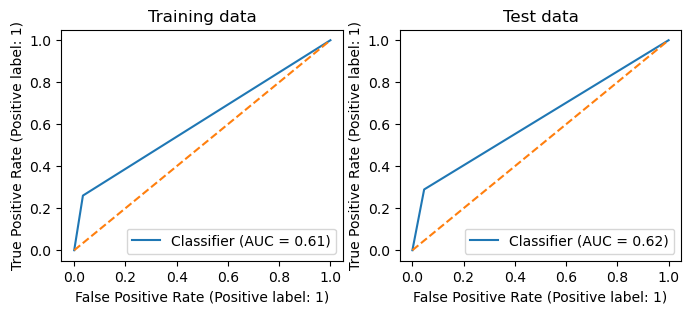

In [8]:
fig, ax =  plt.subplots(nrows = 1, ncols = 2, figsize = (8,3))

_ = RocCurveDisplay.from_predictions(y_clf_train, y_clf_pred_train, ax = ax[0])
_ = RocCurveDisplay.from_predictions(y_clf_test,  y_clf_pred_test,  ax = ax[1])
ax[0].plot([0,1],[0,1],ls = '--');
ax[1].plot([0,1],[0,1],ls = '--');
ax[0].set_title('Training data');
ax[1].set_title('Test data');

#### 2. DecisionTree

In [9]:
# регрессия

from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor(criterion='squared_error', splitter='best', max_depth=None, random_state = 1)

dtr.fit(X_train, y_train)

y_train_pred = dtr.predict(X_train)
mse = mean_squared_error(y_train, y_train_pred)
print(f'Ошибка на обучающих данных: MSE = {mse :.3f}, RMSE = {np.sqrt(mse) :.3f}')

y_test_pred = dtr.predict(X_test)
mse1 = mean_squared_error(y_test, y_test_pred)
print(f'Ошибка на тестовых данных : MSE = {mse1 :.3f}, RMSE = {np.sqrt(mse1) :.3f}')


Ошибка на обучающих данных: MSE = 0.000, RMSE = 0.000
Ошибка на тестовых данных : MSE = 0.501, RMSE = 0.708


Text(0, 0.5, 'RMSE')

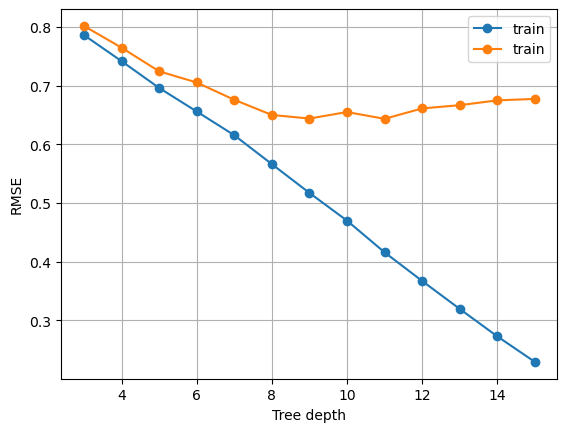

In [28]:
# попробуем ограничить глубину дерева

dpt, rmse_train, rmse_test = [],[],[]
for depth in range(3, 16):
    dpt.append(depth)
    dtr = DecisionTreeRegressor(criterion='squared_error', splitter='best', max_depth = depth, random_state = 1).fit(X_train, y_train)
    mse = mean_squared_error(y_train, dtr.predict(X_train))
    mse1 = mean_squared_error(y_test, dtr.predict(X_test))
    rmse_train.append(np.sqrt(mse))
    rmse_test.append(np.sqrt(mse1))

plt.plot(dpt, rmse_train, 'o-', label = "train");
plt.plot(dpt, rmse_test, 'o-' , label = "train");
plt.legend();
plt.grid(); plt.xlabel('Tree depth'); plt.ylabel('RMSE')

In [29]:
dtr = DecisionTreeRegressor(criterion='squared_error', splitter='best', max_depth = 8, random_state = 1)

dtr.fit(X_train, y_train)

mse = mean_squared_error(y_train, dtr.predict(X_train))
print(f'Ошибка на обучающих данных: MSE = {mse :.3f}, RMSE = {np.sqrt(mse) :.3f}')

mse1 = mean_squared_error(y_test, dtr.predict(X_test))
print(f'Ошибка на тестовых данных : MSE = {mse1 :.3f}, RMSE = {np.sqrt(mse1) :.3f}')

Ошибка на обучающих данных: MSE = 0.321, RMSE = 0.566
Ошибка на тестовых данных : MSE = 0.422, RMSE = 0.650


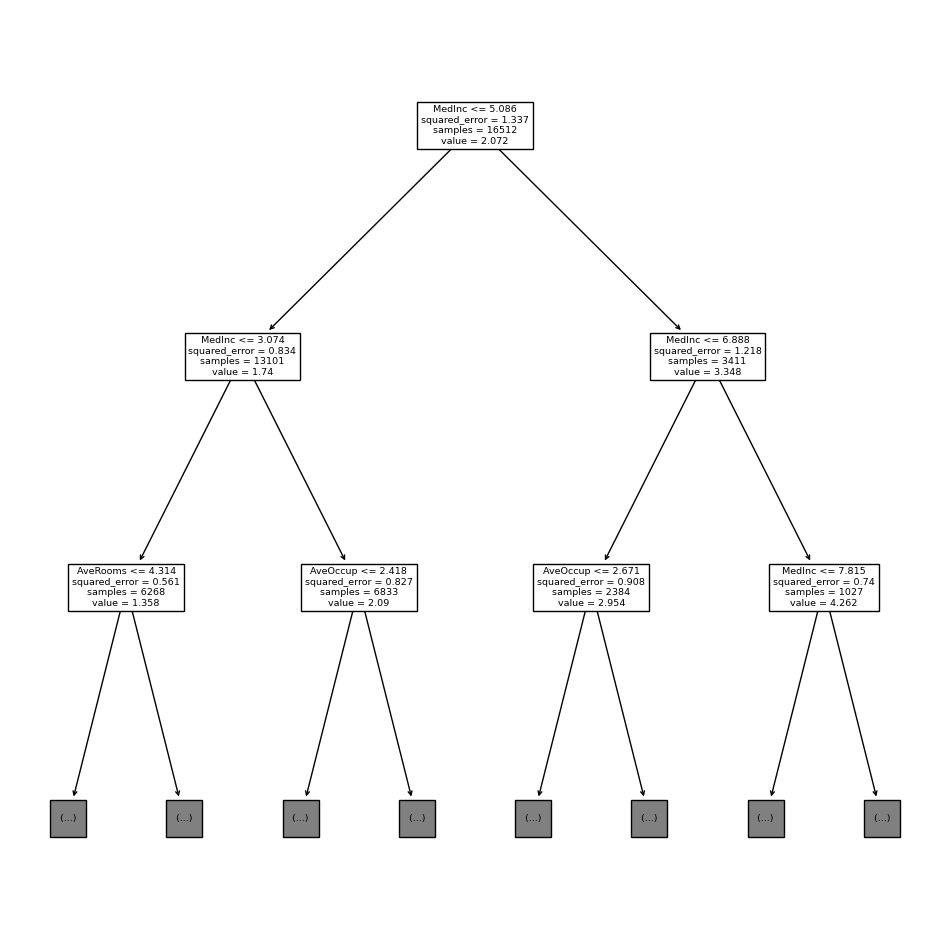

In [33]:
from sklearn.tree import plot_tree

fig, ax = plt.subplots(1,1,figsize = (12,12))
plot_tree(dtr, feature_names = X_train.columns, max_depth = 2, ax = ax);

In [40]:
# классификация

from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(criterion = 'gini', splitter = 'best', max_depth = None, random_state = 1)

dtc.fit(X_clf_train, y_clf_train)

y_clf_pred_train = dtc.predict(X_clf_train)
y_clf_pred_test  = dtc.predict(X_clf_test)

print(f'Accuracy: Train {accuracy_score(y_clf_train, y_clf_pred_train) :.3f} Test {accuracy_score(y_clf_test, y_clf_pred_test) :.3f}')
print(f'ROC AUC : Train {roc_auc_score(y_clf_train, y_clf_pred_train) :.3f} Test {roc_auc_score(y_clf_test, y_clf_pred_test) :.3f}')

Accuracy: Train 1.000 Test 0.737
ROC AUC : Train 1.000 Test 0.638


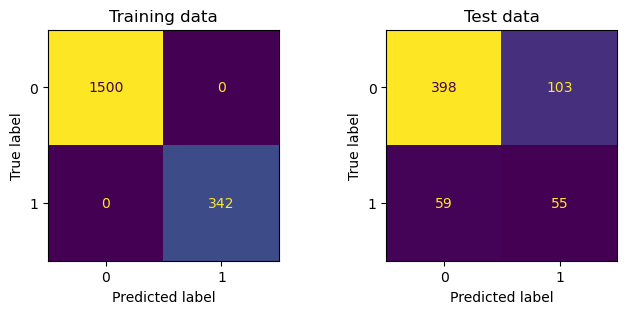

In [35]:
fig, ax =  plt.subplots(nrows = 1, ncols = 2, figsize = (8,3))

_ = ConfusionMatrixDisplay.from_predictions(y_clf_train, y_clf_pred_train, display_labels = dtc.classes_, ax = ax[0], colorbar = False)
_ = ConfusionMatrixDisplay.from_predictions(y_clf_test,  y_clf_pred_test,  display_labels = dtc.classes_, ax = ax[1], colorbar = False)
ax[0].set_title('Training data');
ax[1].set_title('Test data');

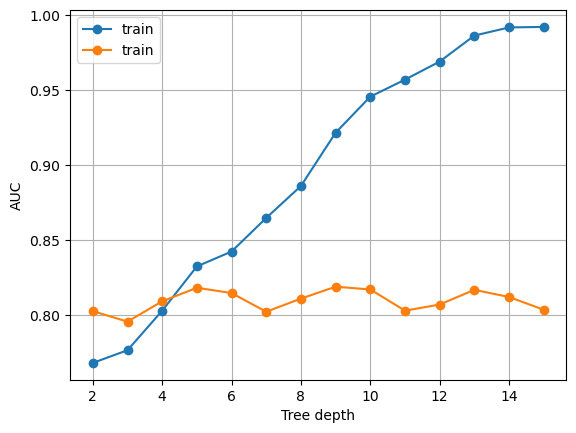

In [39]:
# попробуем ограничить глубину дерева

dpt, auc_train, auc_test = [],[],[]
for depth in range(2, 16):
    dpt.append(depth)
    dtr = DecisionTreeClassifier(criterion = 'gini', splitter = 'best', max_depth = depth, random_state = 1).fit(X_clf_train, y_clf_train)
    auc_train.append(np.sqrt(roc_auc_score(y_clf_train, dtr.predict(X_clf_train))))
    auc_test.append(np.sqrt(roc_auc_score(y_clf_test, dtr.predict(X_clf_test))))

plt.plot(dpt, auc_train, 'o-', label = "train");
plt.plot(dpt, auc_test, 'o-' , label = "train");
plt.legend();
plt.grid(); plt.xlabel('Tree depth'); plt.ylabel('AUC');

In [41]:
dtc = DecisionTreeClassifier(criterion = 'gini', splitter = 'best', max_depth = 5, random_state = 1)

dtc.fit(X_clf_train, y_clf_train)

y_clf_pred_train = dtc.predict(X_clf_train)
y_clf_pred_test  = dtc.predict(X_clf_test)

print(f'Accuracy: Train {accuracy_score(y_clf_train, y_clf_pred_train) :.3f} Test {accuracy_score(y_clf_test, y_clf_pred_test) :.3f}')
print(f'ROC AUC : Train {roc_auc_score(y_clf_train, y_clf_pred_train) :.3f} Test {roc_auc_score(y_clf_test, y_clf_pred_test) :.3f}')

Accuracy: Train 0.860 Test 0.826
ROC AUC : Train 0.693 Test 0.670


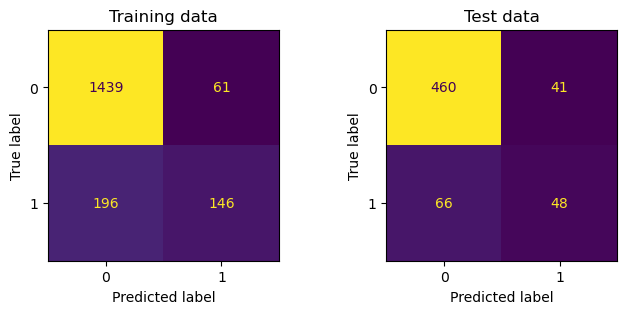

In [42]:
fig, ax =  plt.subplots(nrows = 1, ncols = 2, figsize = (8,3))

_ = ConfusionMatrixDisplay.from_predictions(y_clf_train, y_clf_pred_train, display_labels = dtc.classes_, ax = ax[0], colorbar = False)
_ = ConfusionMatrixDisplay.from_predictions(y_clf_test,  y_clf_pred_test,  display_labels = dtc.classes_, ax = ax[1], colorbar = False)
ax[0].set_title('Training data');
ax[1].set_title('Test data');

#### 3. Random Forest

In [43]:
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier

In [45]:
# регрессия
rfr = RandomForestRegressor(n_estimators=100,
                            criterion='squared_error', 
                            max_depth=None, 
                            max_features=1.0,
                            bootstrap = True,           
                            max_samples = None,         
                            random_state = 1)

rfr.fit(X_train, y_train)

mse = mean_squared_error(y_train, rfr.predict(X_train))
print(f'Ошибка на обучающих данных: MSE = {mse :.3f}, RMSE = {np.sqrt(mse) :.3f}')

mse1 = mean_squared_error(y_test, rfr.predict(X_test))
print(f'Ошибка на тестовых данных : MSE = {mse1 :.3f}, RMSE = {np.sqrt(mse1) :.3f}')

Ошибка на обучающих данных: MSE = 0.036, RMSE = 0.189
Ошибка на тестовых данных : MSE = 0.252, RMSE = 0.502


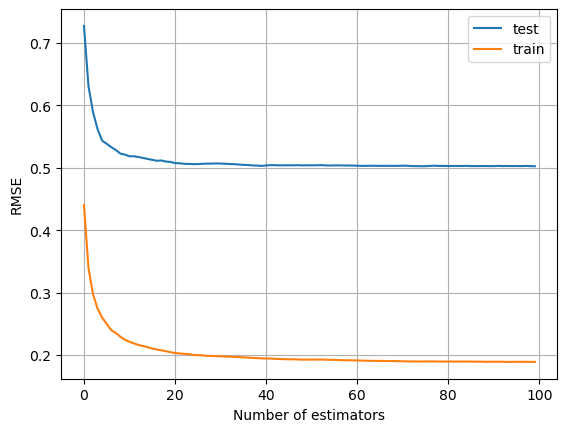

In [64]:
rmse_test, rmse_train = [],[]
y_pred_test = np.zeros(shape = (y_test.shape[0]))
y_pred_train = np.zeros(shape = (y_train.shape[0]))

for i, e in enumerate(rfr.estimators_):
    y_pred_test = y_pred_test + e.predict(X_test.values)
    rmse_test.append(np.sqrt(mean_squared_error(y_test, y_pred_test /(i+1))))
    
    y_pred_train = y_pred_train + e.predict(X_train.values)
    rmse_train.append(np.sqrt(mean_squared_error(y_train, y_pred_train /(i+1))))

plt.plot(rmse_test, label = 'test');
plt.plot(rmse_train, label = 'train');
plt.xlabel('Number of estimators');
plt.ylabel('RMSE');
plt.legend();
plt.grid();

In [50]:
# классификация

rfc = RandomForestClassifier(n_estimators=100,
                             criterion='gini', 
                             max_depth=None, 
                             max_features='sqrt',
                             bootstrap = True,           
                             max_samples = None,
                             random_state = 1)

rfc.fit(X_clf_train, y_clf_train)

y_clf_pred_train = rfc.predict(X_clf_train)
y_clf_pred_test  = rfc.predict(X_clf_test)

print(f'Accuracy: Train {accuracy_score(y_clf_train, y_clf_pred_train) :.3f} Test {accuracy_score(y_clf_test, y_clf_pred_test) :.3f}')
print(f'ROC AUC : Train {roc_auc_score(y_clf_train, y_clf_pred_train) :.3f} Test {roc_auc_score(y_clf_test, y_clf_pred_test) :.3f}')

Accuracy: Train 1.000 Test 0.839
ROC AUC : Train 1.000 Test 0.634


#### 4. Gradient Boosting

In [51]:
from sklearn.ensemble import GradientBoostingRegressor, GradientBoostingClassifier

In [56]:
# регрессия
gbr = GradientBoostingRegressor(loss='squared_error', 
                                learning_rate = 0.1, 
                                n_estimators = 100, 
                                criterion = 'friedman_mse', 
                                max_depth = 5, 
                                random_state = 1)

gbr.fit(X_train, y_train)

mse = mean_squared_error(y_train, gbr.predict(X_train))
print(f'Ошибка на обучающих данных: MSE = {mse :.3f}, RMSE = {np.sqrt(mse) :.3f}')

mse1 = mean_squared_error(y_test, gbr.predict(X_test))
print(f'Ошибка на тестовых данных : MSE = {mse1 :.3f}, RMSE = {np.sqrt(mse1) :.3f}')

Ошибка на обучающих данных: MSE = 0.174, RMSE = 0.418
Ошибка на тестовых данных : MSE = 0.246, RMSE = 0.496


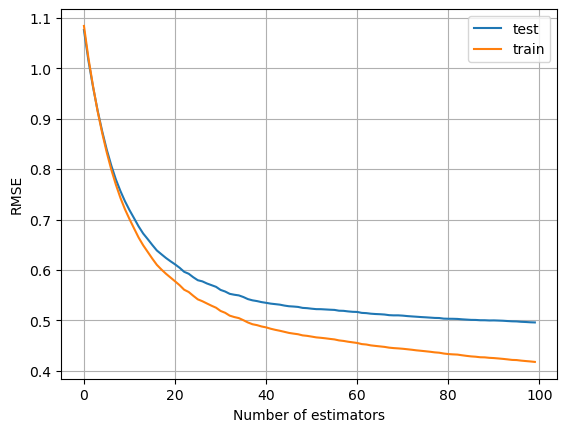

In [78]:
rmse_test, rmse_train = [],[]
y_pred_test = gbr.init_.predict(X_test) 
y_pred_train = gbr.init_.predict(X_train)

for i, e in enumerate(gbr.estimators_):
    y_pred_test = y_pred_test + gbr.learning_rate * e[0].predict(X_test.values)
    rmse_test.append(np.sqrt(mean_squared_error(y_test, y_pred_test)))
    
    y_pred_train = y_pred_train + gbr.learning_rate * e[0].predict(X_train.values)
    rmse_train.append(np.sqrt(mean_squared_error(y_train, y_pred_train)))

plt.plot(rmse_test, label = 'test');
plt.plot(rmse_train, label = 'train');
plt.xlabel('Number of estimators');
plt.ylabel('RMSE');
plt.legend();
plt.grid();

In [90]:
# классификация

gbc = GradientBoostingClassifier(loss='log_loss', 
                                 learning_rate=0.1, 
                                 n_estimators=100, 
                                 criterion='friedman_mse', 
                                 max_depth = 5, 
                                 random_state = 1)

gbc.fit(X_clf_train, y_clf_train)

y_clf_pred_train = gbc.predict(X_clf_train)
y_clf_pred_test  = gbc.predict(X_clf_test)

print(f'Accuracy: Train {accuracy_score(y_clf_train, y_clf_pred_train) :.3f} Test {accuracy_score(y_clf_test, y_clf_pred_test) :.3f}')
print(f'ROC AUC : Train {roc_auc_score(y_clf_train, y_clf_pred_train) :.3f} Test {roc_auc_score(y_clf_test, y_clf_pred_test) :.3f}')

Accuracy: Train 0.971 Test 0.824
ROC AUC : Train 0.923 Test 0.648


#### 5. Кросс-валидация моделей

In [95]:
from sklearn.model_selection import cross_val_score

# Модели регрессии

mr = {'DT' : DecisionTreeRegressor(criterion='squared_error', splitter='best', max_depth = 8, random_state = 1),
      'RF' : RandomForestRegressor(n_estimators=100, criterion='squared_error', max_depth=None, max_features=1.0,random_state = 1),
      'GB' : GradientBoostingRegressor( learning_rate = 0.1, n_estimators = 100, criterion = 'friedman_mse', max_depth = 5, random_state = 1)
     }

# Модели классификации

mc = {'DT' : DecisionTreeClassifier(criterion = 'gini', splitter = 'best', max_depth = 5, random_state = 1),
      'RF' : RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=None, max_features='sqrt',random_state = 1),
      'GB' : GradientBoostingClassifier(loss='log_loss', learning_rate=0.1, n_estimators=100,max_depth = 5, random_state = 1)
     }

In [93]:
for m in mr:
    res = cross_val_score(mr[m], X, y, scoring = 'neg_mean_squared_error', cv = 5)
    print(f'{m :2s}: {-res.mean() :.3f} ({res.std() :.3f})')

DT: 0.609 (0.064)
RF: 0.432 (0.068)
GB: 0.439 (0.113)


In [98]:
for m in mc:
    res = cross_val_score(mc[m], X_clf, y_clf, scoring = 'roc_auc', cv = 5)
    print(f'{m :2s}: {res.mean() :.3f} ({res.std() :.3f})')

DT: 0.735 (0.016)
RF: 0.772 (0.032)
GB: 0.767 (0.031)
